## Module 1.1: Data Exploration

The first section of this module begins with exploring our dataset by looking at some statistics and a few samples.
Next, we will group our dataset into smaller categories.

In [1]:
# import libraries

import numpy as np # numerical / matrix library
import pandas as pd # dataset / excel manipulation
import matplotlib.pyplot as plt # drawing chart, plotting

from skimage.io import imread # read image file
from skimage.transform import resize # resizing image file

### Section 1.1: The Dataset (CSV File)

In [2]:
# austin.csv file location

csv_file = 'data/austin.csv'

# load csv file as data frame

df = pd.read_csv(csv_file)

In [3]:
# explore

print(df.columns)

Index(['id', 'image_name', 'zoning_id', 'zoning_zty'], dtype='object')


In [4]:
# print a few samples

print(df[:10])

    id           image_name  zoning_id zoning_zty
0   30   data/austin_30.jpg  400374361        PUD
1   61   data/austin_61.jpg  400398641       I-RR
2   95   data/austin_95.jpg  400531694        PUD
3   98   data/austin_98.jpg  400579321        PUD
4  107  data/austin_107.jpg  400008155       MF-2
5  125  data/austin_125.jpg  400374364        PUD
6  153  data/austin_153.jpg  400374115        PUD
7  163  data/austin_163.jpg  400374364        PUD
8  171  data/austin_171.jpg  400579321        PUD
9  178  data/austin_178.jpg     237010   CS-MU-CO


In [5]:
# how many zoning codes are there?

print(df['zoning_zty'].value_counts())

PUD              50
P                19
SF-3-NP          19
SF-2             17
AV               15
SF-3             13
DR               11
GR               10
GR-CO            10
UNZ               8
LI                7
LI-NP             7
SF-2-NP           7
CS-NP             6
LI-PDA-NP         6
I-RR              6
GR-NP             6
LI-CO-NP          6
LO                5
CS-CO-NP          5
RR                5
CS-CO             5
CS                4
CS-MU-CO          3
SF-1              3
SF-4A             2
SF-6-CO           2
CS-V              2
LA                2
CS-MU-V-NP        2
                 ..
NBG-NP            1
DMU-CO            1
IP                1
CS-1-V-NP         1
PUD-NP            1
LO-MU-CO-NP       1
MF-3              1
MF-2-NP           1
GO                1
CH-NP             1
LO-V-NP           1
I-SF-2            1
LR                1
P-CO              1
SF-4A-CO          1
GR-V-CO-NP        1
ERC               1
LR-MU-V-NP        1
P-NP              1


### The Images 

File Name: data/austin_181.jpg
Size: (960, 773, 3)
Zoning: SF-2


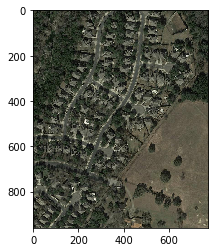

In [6]:
# get a single random image

# generate a random selection
rid = np.random.randint(0, len(df))
# get the file name and zoning_zty (zoning name) corresponding to the index
imgfile = df['image_name'].iloc[rid]
zoning = df.iloc[rid, 3]

# load the selected file name
img = imread(imgfile)

# display
print('File Name:', imgfile)
print('Size:', img.shape)
print('Zoning:', zoning)
plt.imshow(img)
plt.show()

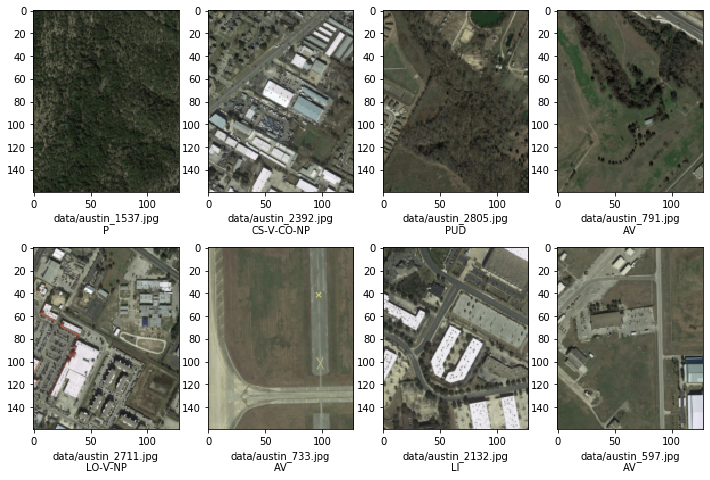

In [7]:
# display 8 samples at once

row, col = 2, 4 # we want 2 rows and 4 columns
fig, axe = plt.subplots(row, col, figsize=(12,8)) # declare the 'tools' to draw our plot

# iterate over row and columns
for i in range(row):
    for j in range(col):
        # for each row and column
        
        # get a random index
        rid = np.random.randint(0, len(df))
        
        # read the image file
        fname = df['image_name'].iloc[rid]
        zone = df['zoning_zty'].iloc[rid]
        img = imread(fname)
        img = resize(img, output_shape=(160, 128))
        # set label
        label = fname + "\n" + zone  
        
        axe[i, j].set_xlabel(label)
        
        axe[i, j].imshow(img)

plt.show()

### Section 1.2: Regrouping zone label name

We found that there are many groups found for zoning name. 
According to the documentation https://www.austintexas.gov/sites/default/files/files/Planning/zoning_guide.pdf, there are only four general group of zones. 
Let's group them using some string processing tricks.

In [8]:
# define our four new group and its associated zone names

grouping = {
    'RESIDENTIAL':['LA', 'RR', 'SF', 'MH'],
    'COMMERCIAL':['NO','LO','GO','CR','LR','GR','L','CBD','DMU','W/LO','CS','CH','IP','LI'],
    'INDUSTRIAL':['IP','LI','MI','R&D'],
    'SPECIAL':['DR','AV','AG','P','PUD','TN']
}

In [9]:
# iterate and match every instance

new_group = []

# iterate each row
for index, row in df.iterrows():
    print('Row:', index, row['image_name'])
    zone = row['zoning_zty'] # extract zone name (zoning_zty)
    print(zone)
    zone = zone.split('-') # split string according to dash
    
    selected_group = '' # the new group corresponds to the current zone
    
    # find the new group
    for z in zone:
        for group in grouping.keys():
            
            if z in grouping[group]:
                selected_group = group
    
    if selected_group == '':
        selected_group = 'UNKNOWN' 
    # the same as: selected_group = 'UNKNOWN' if selected_group == '' else selected_group
    
    print('new group:', selected_group)
    
    new_group.append(selected_group)
    

Row: 0 data/austin_30.jpg
PUD
new group: SPECIAL
Row: 1 data/austin_61.jpg
I-RR
new group: RESIDENTIAL
Row: 2 data/austin_95.jpg
PUD
new group: SPECIAL
Row: 3 data/austin_98.jpg
PUD
new group: SPECIAL
Row: 4 data/austin_107.jpg
MF-2
new group: UNKNOWN
Row: 5 data/austin_125.jpg
PUD
new group: SPECIAL
Row: 6 data/austin_153.jpg
PUD
new group: SPECIAL
Row: 7 data/austin_163.jpg
PUD
new group: SPECIAL
Row: 8 data/austin_171.jpg
PUD
new group: SPECIAL
Row: 9 data/austin_178.jpg
CS-MU-CO
new group: COMMERCIAL
Row: 10 data/austin_181.jpg
SF-2
new group: RESIDENTIAL
Row: 11 data/austin_194.jpg
I-RR
new group: RESIDENTIAL
Row: 12 data/austin_196.jpg
I-RR
new group: RESIDENTIAL
Row: 13 data/austin_205.jpg
PUD
new group: SPECIAL
Row: 14 data/austin_206.jpg
PUD
new group: SPECIAL
Row: 15 data/austin_225.jpg
PUD
new group: SPECIAL
Row: 16 data/austin_227.jpg
CS-CO
new group: COMMERCIAL
Row: 17 data/austin_267.jpg
SF-4A
new group: RESIDENTIAL
Row: 18 data/austin_272.jpg
P
new group: SPECIAL
Row: 19

In [11]:
# create new column 

new_column_frame = pd.DataFrame({'new_zone':new_group})

In [12]:
# new frame

new_df = pd.concat([df, new_column_frame], axis=1)

In [13]:
# how is the new frame looks like?

new_df[:32]

,id,image_name,zoning_id,zoning_zty,new_zone
0,30,data/austin_30.jpg,400374361,PUD,SPECIAL
1,61,data/austin_61.jpg,400398641,I-RR,RESIDENTIAL
2,95,data/austin_95.jpg,400531694,PUD,SPECIAL
3,98,data/austin_98.jpg,400579321,PUD,SPECIAL
4,107,data/austin_107.jpg,400008155,MF-2,UNKNOWN
5,125,data/austin_125.jpg,400374364,PUD,SPECIAL
6,153,data/austin_153.jpg,400374115,PUD,SPECIAL
7,163,data/austin_163.jpg,400374364,PUD,SPECIAL
8,171,data/austin_171.jpg,400579321,PUD,SPECIAL
9,178,data/austin_178.jpg,237010,CS-MU-CO,COMMERCIAL


In [14]:
# check the new zoning distribution

new_df['new_zone'].value_counts()

SPECIAL        98
COMMERCIAL     89
RESIDENTIAL    84
INDUSTRIAL     31
UNKNOWN        18
Name: new_zone, dtype: int64

In [15]:
# save to a new file

new_csv_file = 'data/austin_newzone.csv'

new_df.to_csv(new_csv_file, index=False)